### Problem Statement: To build a smart system to predict the CTR for email campaigns.

### Importing all the basic library

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [112]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_Data.csv')

In [113]:
#Display all the rows and columns upto 100 observation
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### Data Insights & EDA

In [114]:
# Printing the shape of the train and test dataset

print(train.shape)
print('The training data has {} Rows and {} columns'.format(train.shape[0],train.shape[1]))

print('\n' , test.shape)
print('The testing data has {} Rows and {} columns'.format(test.shape[0],test.shape[1]))

(1888, 22)
The training data has 1888 Rows and 22 columns

 (762, 21)
The testing data has 762 Rows and 21 columns


In [115]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [116]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


In [117]:
#View summary of dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

#### Comments:
- And there are 1 Categorical feature and 20 numerical feature.

### Check for missing values in dataset

In [118]:
train.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

#### Comments:
#### There are no missing values present in the data.

### Checking for Duplicate Values

In [119]:
train.duplicated().sum()

0

#### Comments:
- There are no duplicate values present in the data.

In [120]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("\n\n Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 1
Index(['times_of_day'], dtype='object')


 Numerical Features in DataSet: 21
Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'category',
       'product', 'no_of_CTA', 'mean_CTA_len', 'is_image', 'is_personalised',
       'is_quote', 'is_timer', 'is_emoticons', 'is_discount', 'is_price',
       'is_urgency', 'target_audience', 'click_rate'],
      dtype='object')


## Univariate Analysis

### - The numerical features

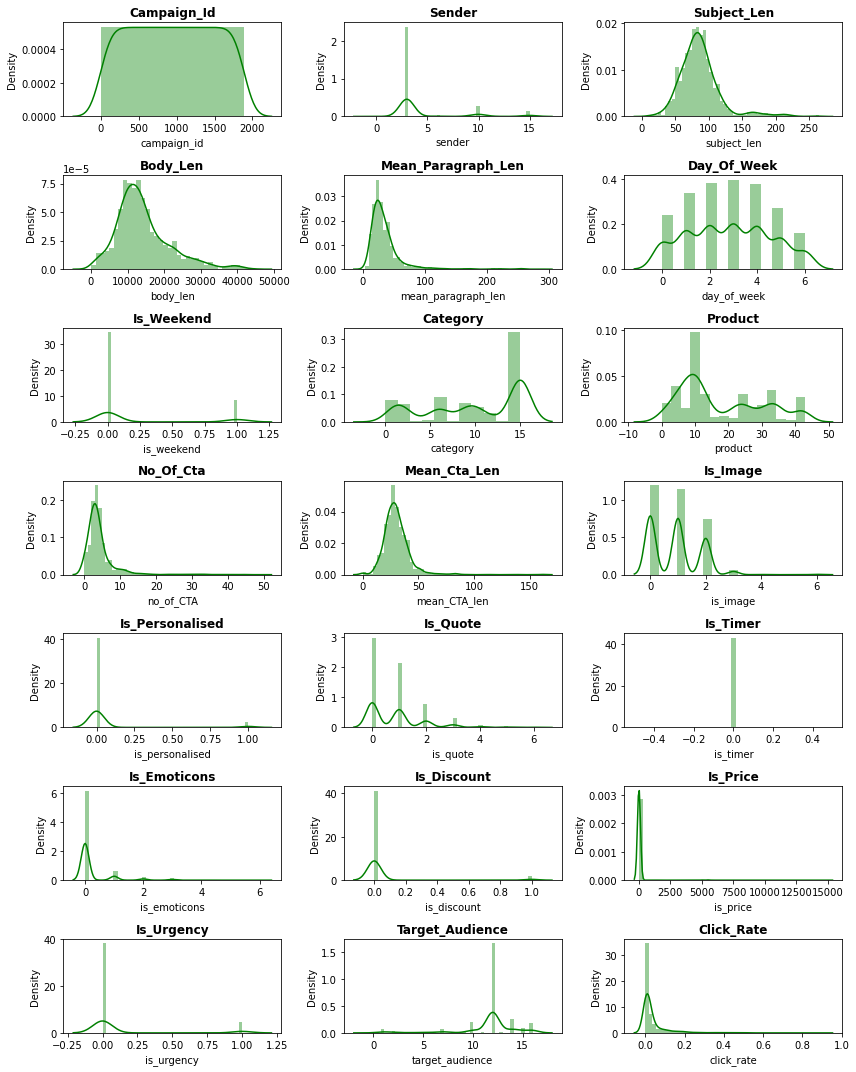

In [89]:
target = [i for i in numerical.columns]
plt.figure(figsize=(12,15))
for n,column in enumerate(target):
    plot=plt.subplot(7,3,n+1)
    sns.distplot(train[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

#### Comments:

- Most of them are boolean type.
- 'subject_len', 'body_len','mean_paragraph_len', 'day_of_week','times_of_day','no_of_CTA', 'mean_CTA_len' are important features we are goint to have a close look.

### - The categorical features

<AxesSubplot:xlabel='times_of_day', ylabel='count'>

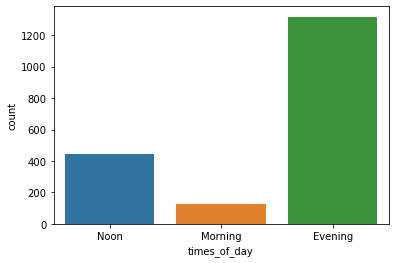

In [122]:
sns.countplot(train['times_of_day'])

#### Comments:
- Most of the emails belong to evening time of day.

### Multivariate Analysis

<AxesSubplot:>

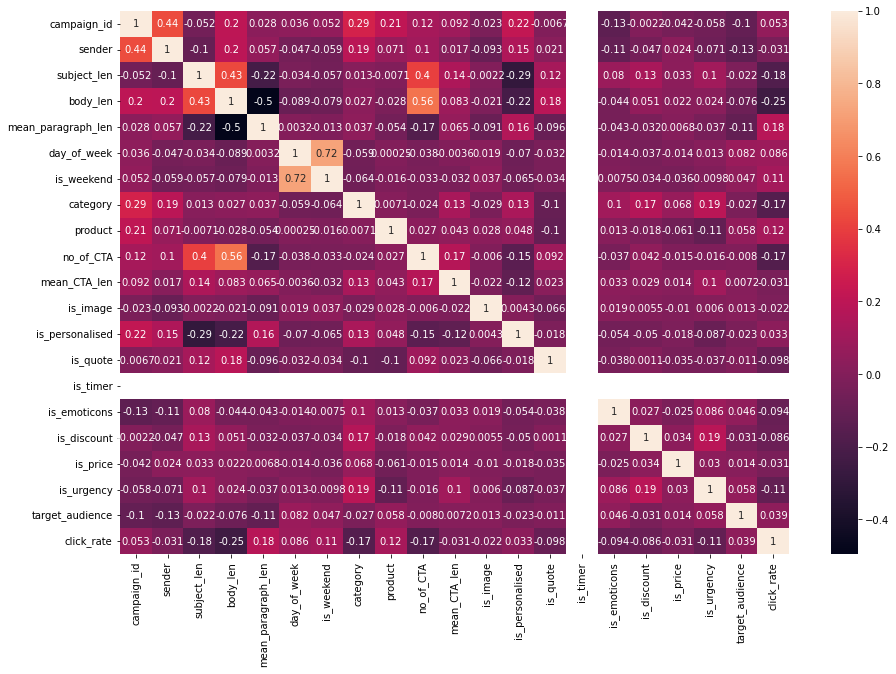

In [91]:
plt.figure(figsize=(15,10))

sns.heatmap(train.corr(),annot=True)

### Feature Engineering

In [123]:
#Try creating new features

train['body_len'] = train['body_len'].apply(lambda x: 'small' if x <= 5000 else('mid' if x > 5000  and x<=20000  else 'large'))
test['body_len'] = test['body_len'].apply(lambda x: 'small' if x <= 5000 else('mid' if x > 5000  and x<=20000  else 'large'))

train['subject_len'] = train['subject_len'].apply(lambda x: 'small' if x <= 100 else 'big')
test['subject_len'] = test['subject_len'].apply(lambda x: 'small' if x <= 100 else 'big')

In [124]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

ordenc = OrdinalEncoder(categories=[['small','big'],['small', 'mid', 'large']])

In [125]:
train[['subject_len','body_len']] = pd.DataFrame(ordenc.fit_transform(train[['subject_len','body_len']]),dtype=int)
test[['subject_len','body_len']] = pd.DataFrame(ordenc.transform(test[['subject_len','body_len']]),dtype=int)

In [126]:
train['total_CTA_len'] = train['mean_CTA_len'] * train['no_of_CTA']
train['total_CTA_len'] = train['total_CTA_len'].apply(lambda x: 0 if x <= 150 else 1)

test['total_CTA_len'] = test['mean_CTA_len'] * test['no_of_CTA']
test['total_CTA_len'] = test['total_CTA_len'].apply(lambda x: 0 if x <= 150 else 1)

In [127]:
#Try creating new features

train['total_email_len']= train['subject_len']+train['body_len']
test['total_email_len']= test['subject_len']+test['body_len']

In [128]:
train = pd.get_dummies(train,columns=['times_of_day'],drop_first= True)
test = pd.get_dummies(test,columns=['times_of_day'],drop_first= True)

#### Dividing the dataset into X and y 

In [129]:
X = train.drop(['sender','campaign_id','day_of_week','click_rate','mean_CTA_len','is_timer','is_price'],axis =1)
y = train['click_rate']

campaign_id= test['campaign_id']
test= test.drop(['sender','campaign_id','day_of_week','mean_CTA_len','is_timer','is_price'],axis =1)

In [130]:
X.head()

,subject_len,body_len,mean_paragraph_len,is_weekend,category,product,no_of_CTA,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,total_CTA_len,total_email_len,times_of_day_Morning,times_of_day_Noon
0,0,1,39,1,6,26,3,0,0,0,0,0,0,14,0,1,0,1
1,0,0,256,1,2,11,0,0,0,0,0,0,0,10,0,0,1,0
2,0,1,16,1,2,11,3,1,0,1,0,0,0,16,0,1,0,1
3,0,1,30,0,15,9,4,0,0,0,0,0,0,10,0,1,0,0
4,0,1,27,1,6,26,3,0,0,1,0,0,0,14,0,1,0,1


#### Scaling using Standard-Scaler

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
test=scaler.transform(test)

## Bulding Different Models

In [132]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size = 0.15, random_state = 1)

### Importing different Regression Algorithm

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
import lightgbm

from sklearn.metrics import r2_score, mean_squared_error

In [134]:
regressors = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), 
              ExtraTreeRegressor(),HistGradientBoostingRegressor(),XGBRFRegressor(n_estimators=500, max_depth=12, eta=0.1, subsample=0.7, colsample_bytree=0.8),CatBoostRegressor(),AdaBoostRegressor(),XGBRegressor(),lightgbm.LGBMRegressor()]
names = ['Linear_Regression', 'DecisionTree', 'Random_Forest','ExtraTree', 'HistGradientBoosting','XGboostRF','catboost','adaboost','xgboost','LiGHtgbm']

In [ ]:
model_dict = {}
for name, reg in zip(names, regressors):
    
    # training
    reg.fit(x_train, y_train)
    
    # accuracy
    score = reg.score(x_test, y_test)
    model_dict[name] = [r2_score(y_test.values, reg.predict(x_test)), mean_squared_error(y_test.values, reg.predict(x_test)) ]

In [104]:
model_df = pd.DataFrame(model_dict, index = ['R2_score','mean_squared_error']).T
model_df= model_df.sort_values(by=['R2_score', 'mean_squared_error'], ascending=False)
model_df

,R2_score,mean_squared_error
catboost,0.645555,0.002198
xgboost,0.595807,0.002507
XGboostRF,0.590993,0.002537
Random_Forest,0.558809,0.002736
HistGradientBoosting,0.535003,0.002884
LiGHtgbm,0.505260,0.003069
ExtraTree,0.262414,0.004575
DecisionTree,0.242870,0.004696
Linear_Regression,0.122442,0.005443
adaboost,-0.909706,0.011845


## Stacking Regressor

In [ ]:
from sklearn.ensemble import StackingRegressor

xg=XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
rf= RandomForestRegressor(n_estimators=2000,random_state=1,max_features=0.25,max_depth=17,bootstrap=False)
ct=CatBoostRegressor(random_state=1)

estimator_list = [ 
    ('ct',ct),
    ('xg',xg),
    ('rmf',rf)]

str = StackingRegressor( estimators=estimator_list)

str.fit(x_train,y_train)  

In [135]:
str.score(x_test,y_test)  

0.6424589104312817

#### Comment:
- Stacking Regreesion performing well so we are going to predict with this model.

### Prediction

In [136]:
y_pred=str.predict(test)

## Submission

In [137]:
submission = pd.DataFrame()
submission['campaign_id'] = campaign_id
submission['Habitability_score'] = y_pred
submission.to_csv('Final.csv', index=None)

In [138]:
submission.shape

(762, 2)

In [139]:
submission.head(3)

,campaign_id,Habitability_score
0,1889,0.072130
1,1890,0.684950
2,1891,0.218483
